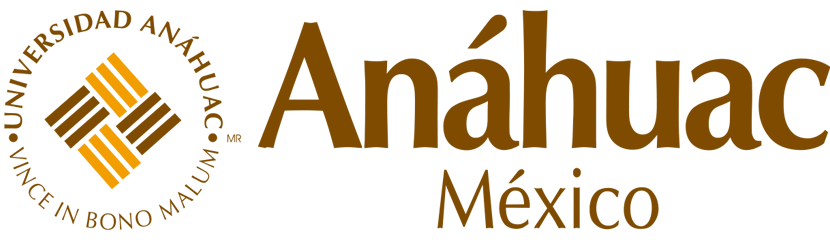


# Proyecto Final


## Optimizacion de Sistemas

### Integrantes

| Nombre | No. Expediente |
| :---: | :---: |
|Pablo Alfonso Lechuga Vazquez | 00129247 |
|Edgar Ivan Torres Perez | 00109794 |
|Rodrigo Andrés Romero Torres | 00431615 |
|Daniel Luizet Castro Ramos | 00395470 |

# Método Simplex

## Introducción

La investigación de operaciones surgió durante la Segunda Guerra Mundial en Gran Bretaña como un campo estructural del conocimiento con una orientación militar no directamente relacionado con lo Logístico (Laporte, 2008). En donde se enfocaron en optimizar el uso de radar, planear ataques contra los submarinos alemanes y proteger las expediciones navales de los Aliados (Waddington, 1973).

Al finalizar la guerra con el auge de la computación surgió un campo conocido como la programación lineal, vista como la habilidad de establecer un camino de decisiones detalladas que llevan a lograr el mejor objetivo dentro de una situación de gran complejidad (Dantzig, 2002). Un método para encontrar la solución a problemas de programación es el método simplex desarrollado por Dantzing en 1947, el cual fue incluido dentro del Top 10 de los mejores algoritmos del siglo XX (Cipra, 2000).

## ¿Qué es el método Simplex?

En 1946 Dantzig fue desafiado por sus colegas del Pentágono para que pensara en una manera de como mecanizar un proceso de planeación en el que tenía que computar rápidamente escenarios de programa despliegue, formación y suministro logístico, en una época donde no había aun computadores electrónicos (Dantzig, 2002). Dando como resultado un método algebraico de 7 pasos para resolver problemas de programación lineal de más de dos variables con restricciones del tipo menor o igual (Chediak Pinzón, 2013).

## Procedimiento

Realizaremos el método siguiendo los pasos explicados por Rajagopal, K. (2012) y en paralelo lo resolveremos en Python:

Planteamos el modelo matemático con sus respectivas restricciones

$$
Maximize \; Z = c_1x_1 + c_2x_2 + c_3x_3 + ... + c_nx_n
$$

Sujeto a:

$$	
a_{11}x_1	+	a_{12}x_2	+	a_{13}x_3	+\; ... +	a_{1n}x_n	\leq	b_1
$$
$$
a_{21}x_1	+	a_{22}x_2	+	a_{23}x_3	+\; ... +	a_{2n}x_n	\leq	b_2
$$
$$
a_{31}x_1	+	a_{32}x_2	+	a_{33}x_3	+\; ... +	a_{3n}x_n	\leq	b_3
$$
$$
a_{m1}x_1	+	a_{m2}x_2	+	a_{m3}x_3	+\; ... +	a_{mn}x_n	\leq	b_m
$$
$$
	x_1\geq0;		x_2\geq0;		x_3\geq0;\; ... \;;		x_n\geq0;		
$$

donde

$$
n= número\; de\; variables\; dadas\; por\; el\; problema
$$
$$
m= número\; de\; restricciones\;
$$

$$
x_1, x_2, x_3, ... x_n\; son\; variables\; de\; decisión\; del\; problema\; dado
$$
$$
c_1, c_2, c_3, ... c_n\; son\; los\; coeficientes\; de\; las\; variables\; de\; decisión\; del\; problema\; dado
$$

**1. Importar librerías**

In [ ]:
import numpy as np
import copy as cp


**2. Generación de Funciones**

Se propone la función `get_matrix` para ingresar la información en matricez a partir de un texto separando por ";" para las filas y " " para las columnas

In [ ]:
def get_matrix(data): 
    rows = data.split(";")    
    for i,x in enumerate(rows):
        rows[i] = x.split(" ")
    if len(rows)==1:
        rows=rows[0]    
    return np.array(rows,dtype=np.float)

La función `get_net_value` calcula la función objetivo con el input de la iteración deseada, realizando un producto puntos entre las variables básicas de la iteración con su respectivo coeficiente

In [ ]:
def get_net_value(c,mat):
    zj = c.dot(mat)
    net_value = z-zj
    return net_value


**3. Solucion de los sistemas de ecuaciones de _Gauss - Jordan_**

 

Una gran parte de la teoría utilizada se base en la teoria de álgebra lineal al resolver por medio de matrices los sistemas de ecuaciones lineales aplicando el método de Gauss-Jordan. El ___método símplex___ es una variación sobre este algoritmo, ya que además de resolver un sistema de ecuaciones, se evalúa la función objetivo en dicha solución y se determina si es óptima o no; en caso de no ser óptima el algoritmo recorre los vértices del polígono de soluciones factibles y termina el proceso iterativo hasta obtener el valor que maximiza o minimiza la
función objetivo.

 

La funcion `solve_gauss_jordane(mat, const_b, key_r, key_c)` propuesta resuelve el sistema de ecuaciones (matrices ingresadas) aplicando este metodo.

In [ ]:
def solve_gauss_jordane(mat,const_b,key_r,key_c):
    
    #Localizamos Numero llave
    key_number = mat[key_r,key_c]
    key_row = mat[key_r]
    
    #Iteramos por cada fila de la matriz
    for x,row in enumerate(mat):
        
        #evaluamos que no sea fila llave
        if x!=key_r:
            
            #Obtenemos indice
            number_colum = row[key_c]
            ratio = number_colum/key_number
            
            #Obtenemos nuevos valores (Matriz y b)
            mat[x] = row - (key_row*ratio)
            const_b[x] = const_b[x] - (const_b[key_r]*ratio)
    
    #Obtenemos y sustituimos valores de fila llave y b
    mat[key_r]=key_row/key_number
    const_b[key_r]=const_b[key_r]/key_number
    return mat,b

**4. Solución por método Simplex**

Paso 1: Convertir el problema de programación lineal en un problema de maximización. \
Paso 2: Convertir las desigualdades en igualdades adiciones las variables de holgura. \
Paso 3: Establecer los datos inciales. \
Paso 4: Identificar la columna, razón de reemplazo, fila, número clave. \
Paso 5: Utilizando los datos anteriores realizaremos reemplazos de la fila clave y no clave utilizando la función de Gauss - Jordan \
Paso 6: Repetir desde el paso 4 hasta hallar la solución óptima \
Paso 7: Encontramos la solución óptima

In [ ]:
def solve_simplex(matrix,b,z):
    #Obtener datos de la Matriz
    rows = matrix.shape[0]
    columns = matrix.shape[1]
    
    #Generamos valor neto de la Matriz 
    cb = cp.deepcopy(z[-rows:])
    cb_pos = list(range(columns-rows,columns))
    
    net_value = get_net_value(cb, matrix)
    
    #Evaluamos valor neto siempre que tenga un numero mayor a 0
    while any(net_value>0):

        #Obtenemos la columna llave
        key_column_ix = np.argmax(net_value)
        
        #Obtenemos el indice de remplazo
        rep_ratio = b/matrix[:,key_column_ix]
        
        #Obtener index de valores mayores a 0 en el array
        positive_values = np.where(rep_ratio>0)[0]
        
        #Obtenemos la fila llave
        key_row_ix = positive_values[rep_ratio[positive_values].argmin()]
        
        #Almacenamos variable y coeficiente
        cb[key_row_ix]= cp.deepcopy(z[key_column_ix])
        cb_pos[key_row_ix]=cp.deepcopy(key_column_ix) 
        
        matrix,b = solve_gauss_jordane(matrix,b,key_row_ix,key_column_ix)
        
        #Generamos nuevo valor neto de la Matriz
        net_value = get_net_value(cb, matrix)
    
    #Se entregan resultados
    zjb = cb.dot(b)
    print("""La solucion maxima es de %s utilizando \
    las siguientes variables"""  % zjb)
    
    for ix,pos in enumerate(cb_pos):
        print("Variable %s = %s" %(pos+1,round(b[ix],1)))

    print(net_value)

In [ ]:
#Obtenemos matrices para iniciar el metodo
print("Introduce la Matriz de los coeficientes de las variables de forma estándar, separando las filas con ; y \
las columnas por espacio")
input_ma = input()
print("Introduce los valores del lado derecho de las restricciones separando por espacio")
input_b = input()
print("Introduce los coeficientes de las variables de la función objetivo incluyendo las de holgura, separando por espacio")
input_z = input()

#Convertir Input en Matrices
matrix = get_matrix(input_ma)
b = get_matrix(input_b)
z = get_matrix(input_z)

#Resolver problema por metodo Simplex
solve_simplex(matrix,b,z)

Introduce la Matriz de los coeficientes de las variables de forma estándar, separando las filas con ; y las columnas por espacio
1 2 1 1 0 0;3 0 2 0 1 0;1 4 0 0 0 1
Introduce los valores del lado derecho de las restricciones separando por espacio
430 460 420
Introduce los coeficientes de las variables de la función objetivo incluyendo las de holgura, separando por espacio
3 2 5 0 0 0
La solucion maxima es de 1350.0 utilizando     las siguientes variables
Variable 2 = 100.0
Variable 3 = 230.0
Variable 6 = 20.0
[-4.  0.  0. -1. -2.  0.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in true_divide


## Bibliografía
Chediak Pinzón, F. A. (2013). Investigación de operaciones. Volumen I (3a. ed.). Universidad de Ibagué. https://elibro-net.eu1.proxy.openathens.net/es/lc/anahuac/titulos/70155

Cipra B. A. (2000). The Best of the 20th Century: Editors Name Top 10 Algorithms. SIAM News, 33(4), 1-2. Retrieved from https://web.archive.org/web/20180328230144/http://www.siam.org/pdf/news/637.pdf

Dantzig, G. B. (2002). Linear programming. Operations Research, 50(1), 42-47. Retrieved from https://search.proquest.com/docview/219190236?accountid=41021

Laporte, G. (2008). Operational research: Milestones and highlights of canadian contributions. Infor, 46(4), 309-0_5. Retrieved from https://search.proquest.com/docview/228519473?accountid=41021

Rajagopal, K. (2012). Operations research. New Delhi: PHI learning (1st. ed.). New Delhi. ISBN-13: 978-8120346345

Snyman, J. A., & Wilke, D. N. (2018). Practical Mathematical Optimization. Springer Optimization and Its Applications, 341–372. https://doi.org/10.1007/978-3-319-77586-9

Stojiljković, M. (22 de Junio de 2020). Hands-On Linear Programming: Optimization With Python. realpython.com. Recuperado el 14 de 09 de 2020, de realpython.com: https://realpython.com/linear-programming-python/

Waddington, C.H. (1973), OR in World War 2 - Operational Research against the U Boat, Elek Science, London. Science, 184(4144), 1364–1365. https://doi.org/10.1126/science.184.4144.1364
 
